In [2]:
from emnist import extract_training_samples
from emnist import extract_test_samples
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import os
from numpy import mean
from numpy import std
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.neighbors.nearest_centroid import NearestCentroid
import pandas as pd
from scipy.spatial import distance_matrix


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
X_train, y_train = extract_training_samples('balanced')
X_test, y_test = extract_test_samples('balanced')

In [6]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

In [7]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test  = pd.DataFrame(X_test)
y_test  = pd.DataFrame(y_test)
y_train = y_train.rename(columns={0: "label"})
y_test = y_test.rename(columns={0: "label"})

In [8]:
print("Xtrain_Shape:",X_train.shape)
print("Xtest_Shape:",X_test.shape)
print("Ytrain_Shape:",y_train.shape)
print("Ytest_Shape:",y_test.shape)

Xtrain_Shape: (112800, 784)
Xtest_Shape: (18800, 784)
Ytrain_Shape: (112800, 1)
Ytest_Shape: (18800, 1)


In [9]:
char_map = pd.read_csv("class_char_mapping.csv")
char_map = char_map.rename(columns = {'0': "label", '1': "character"})

In [10]:
y_train = pd.merge(y_train, char_map, on = 'label', how = 'left')
y_test = pd.merge(y_test, char_map, on = 'label', how = 'left')

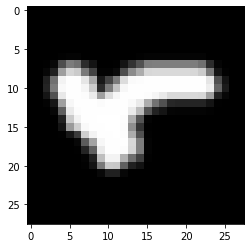

In [84]:
#visualising the first letter (r)
letter = np.array(X_train.iloc[0,:])
letter = letter.reshape(28,28)
plt.imshow(letter, cmap="gray")

In [68]:
#Visualisation
letters = y_train
letters ['char_type'] = np.where(letters['label']<10, 'num', 'alpha')
letters['mean'] = X_train.mean(axis=1).astype("float16")
letters = letters.sort_values('label')

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)
letters['pca-one'] = pca_result[:,0]
letters['pca-two'] = pca_result[:,1]

X = np.array(letters[['pca-one','pca-two']])
y = np.array(letters['character'])
clf = NearestCentroid()
clf.fit(X, y)

centroids = pd.DataFrame(clf.centroids_, columns=['x', 'y'], index = clf.classes_ ) 
cen_matrix = pd.DataFrame(distance_matrix(centroids.values, centroids.values), index=centroids.index, columns=centroids.index)

cen_dist = pd.DataFrame(cen_matrix.stack().sort_values(ascending=False).reset_index())
cen_dist = cen_dist.rename(columns = {0: 'dist'})

bottom = cen_dist[cen_dist['dist']>0].tail(50)
top = cen_dist[cen_dist['dist']>0].head(50)

In [ ]:
# PCA for 1,I,O,0,n,3

array = ['1','I','O','0','n','3']
data = letters.loc[letters['character'].isin(array)]

plt.figure(figsize=(15,15))
ax = sns.kdeplot(
    x="pca-one", y="pca-two",
    hue=data.character.tolist(),
    palette= ['crimson', 'rosybrown', 'navy', 'cyan', 'skyblue', 'gold'],
    data=data,
    legend="full",
    alpha=0.4,
    s = 100,
    hue_order = array,
    fill=True,
    thresh=0.1, levels=2)
plt.setp(ax.get_legend().get_texts(), fontsize='22')
plt.title("2 component PCA for [1,I,O,0,n,3]", fontsize = 20)
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.show()

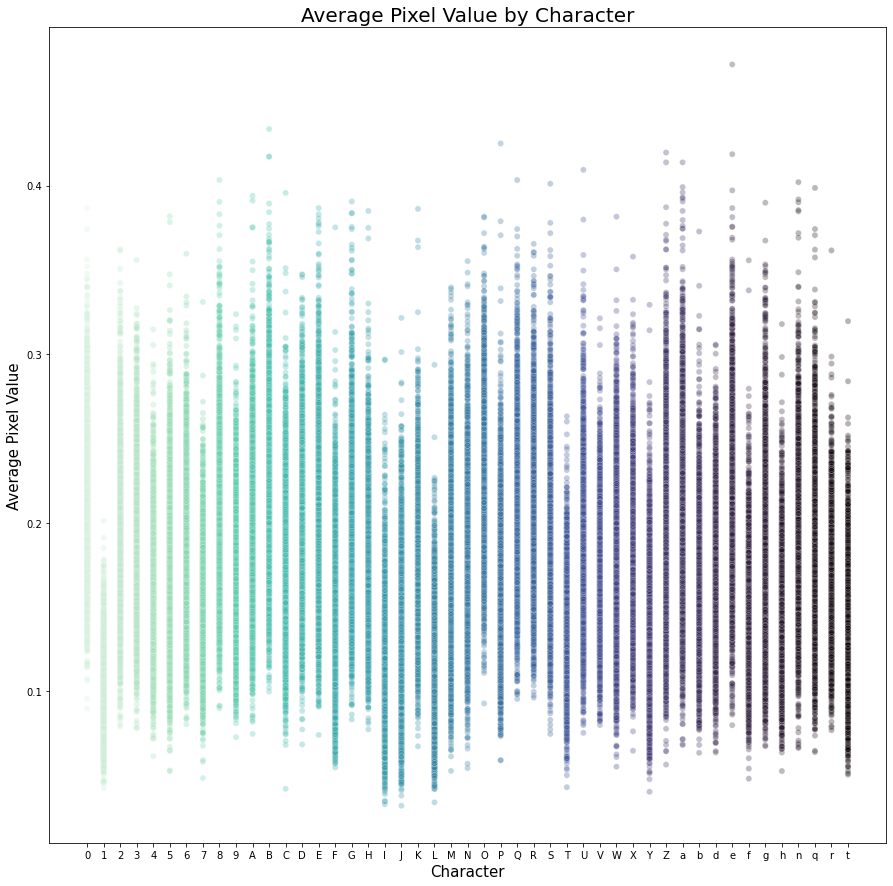

In [76]:
plt.figure(figsize=(15,15))
g = sns.scatterplot(
    x="character", y="mean",
    hue=letters['label'].tolist(),
    palette= sns.color_palette("mako_r", 47),
    legend = False,
    data=letters,
    alpha=0.3
)
plt.title("Average Pixel Value by Character", fontsize = 20)
plt.xlabel('Character', fontsize = 15)
plt.ylabel('Average Pixel Value', fontsize = 15)
plt.show()

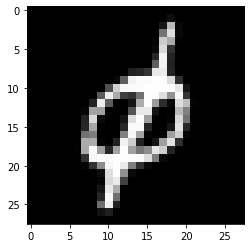

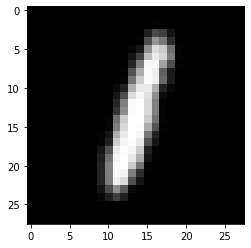

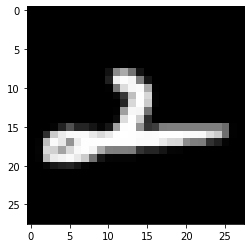

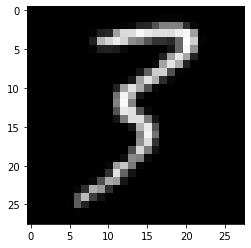

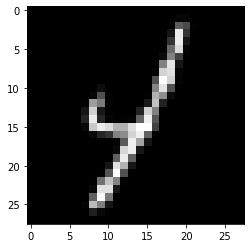

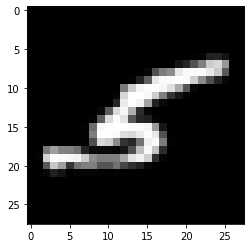

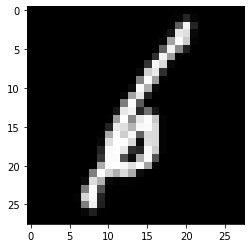

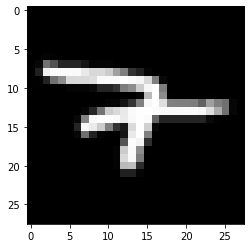

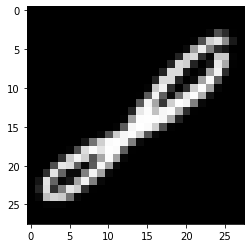

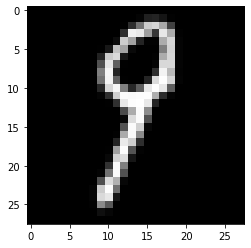

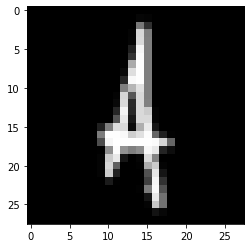

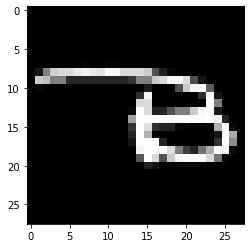

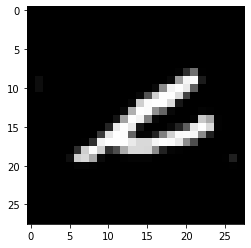

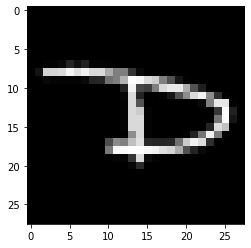

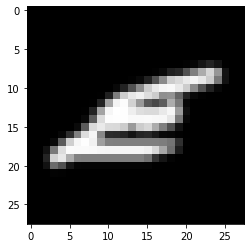

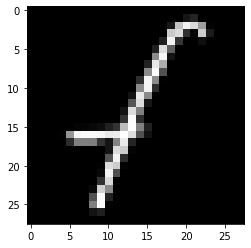

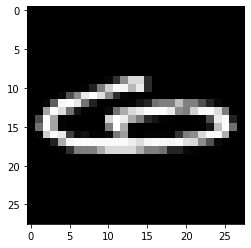

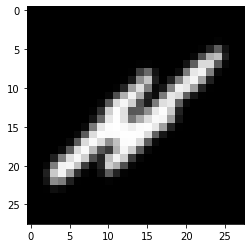

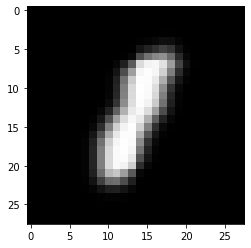

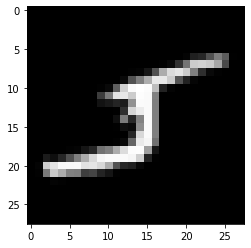

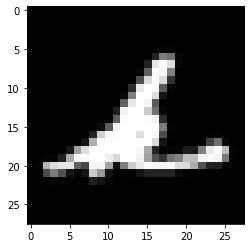

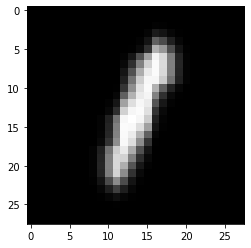

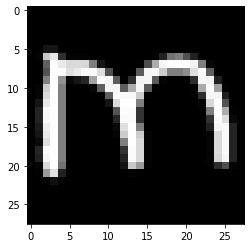

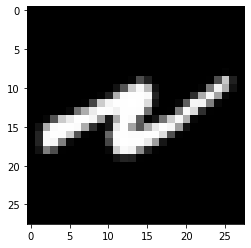

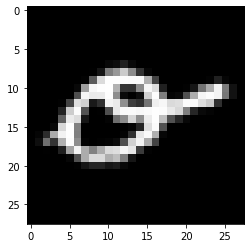

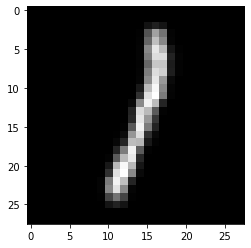

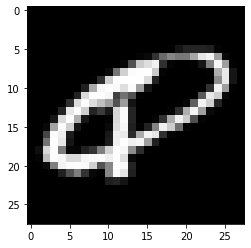

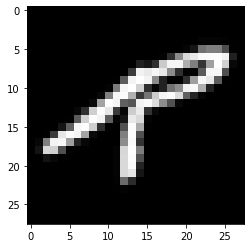

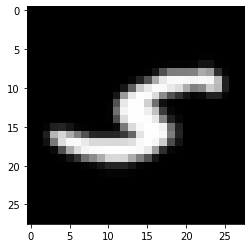

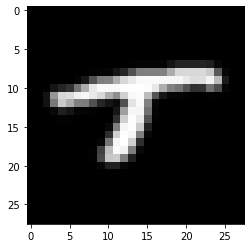

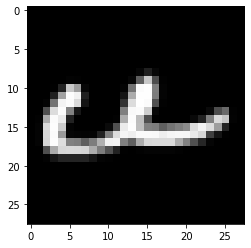

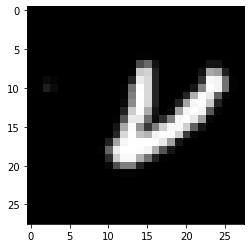

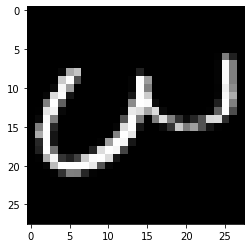

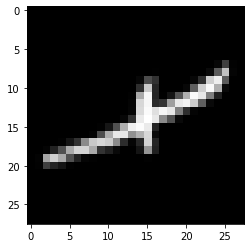

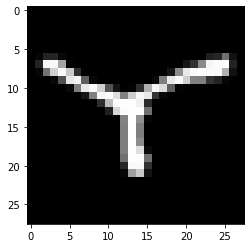

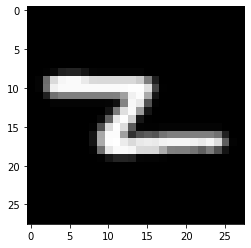

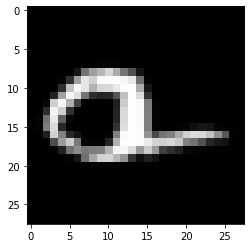

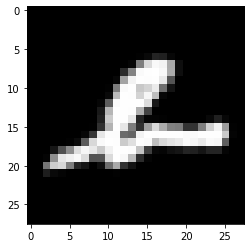

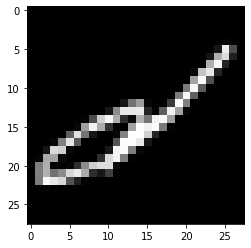

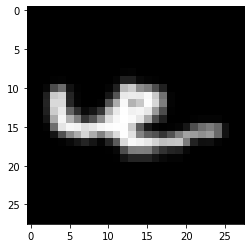

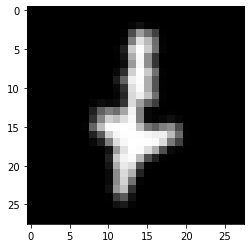

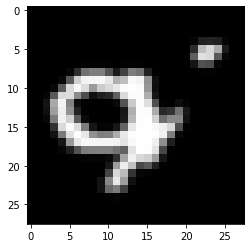

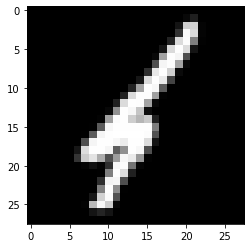

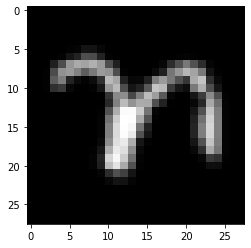

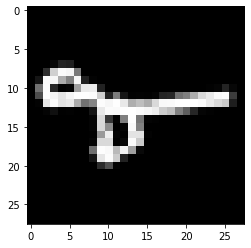

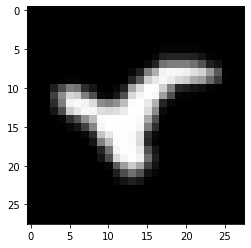

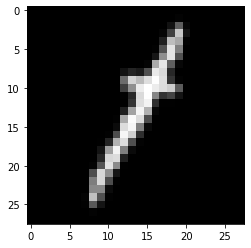

In [56]:
#visualising the letters

for i in lowest_mean:
    letter_0 = np.array(X_train.iloc[i,:])
    letter_1 = letter_0.reshape(28,28)
    plt.imshow(letter_1, cmap="gray")
    plt.show()

In [11]:
def classification(algo_type):
        
    metrics = {'accuracy' : [],
               #'f1-score' : [],
               'runtime'  : []}
    start = time.time()
    
       
    x_tr = X_train
    y_tr = y_train.character

    x_te = X_test
    y_te = y_test.character

    if (algo_type == 'zeroR'):
        clf = DummyClassifier(strategy="most_frequent")
        clf.fit(x_tr, y_tr)

    if (algo_type == 'DT'):
        clf = DecisionTreeClassifier()
        clf.fit(x_tr, y_tr)
        
    if (algo_type == 'RF'):
        clf = RandomForestClassifier()
        clf.fit(x_tr, y_tr)

    if (algo_type == 'svm_linear'):

        clf = OneVsRestClassifier(LinearSVC())
        clf.fit(x_tr, y_tr)

    if (algo_type == 'knn'):

        clf = KNeighborsClassifier()
        clf.fit(x_tr, y_tr)

    y_pred = clf.predict(x_te)
    metrics['accuracy'].append(accuracy_score(y_te, y_pred))
    #metrics['f1-score'].append(f1_score(y_te, y_pred))
    stop = time.time()
    metrics['runtime'].append(stop - start)
    
    return(metrics)

In [26]:
metrics_0r = classification('zeroR')
print(metrics_0r)

{'accuracy': [0.02127659574468085], 'runtime': [0.058142900466918945]}


In [129]:
metricsDT = classification('DT')
print(metricsDT)

{'accuracy': [0.5895744680851064], 'runtime': [57.611112117767334]}


In [128]:
metricsRF = classification('RF')
print(metricsRF)

{'accuracy': [0.8121808510638298], 'runtime': [138.75208139419556]}


In [126]:
metricsknn = classification('knn')
print(metricsknn)

{'accuracy': [0.5897858295768392], 'runtime': [2689.38478275692953]}


In [127]:
metricssvm = classification('svm_linear')
print(metricssvm)

{'accuracy': [0.6748295829204068], 'runtime': [1839.39596822010485]}
